In [27]:
import numpy as np
import matplotlib.pyplot as plt

from plot.multicurve import MultiCurvePlotter
from plot.log_dual_plot import LogDualPlot

from core.nodes.transmission_node import TransmissionNode
from core.nodes.computing_node import ComputingNode

import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({
    'text.usetex': False,  # Disable LaTeX to use system fonts
    'font.family': 'sans-serif',
    'font.sans-serif': ['Arial'],  # Impact first, fallbacks
    'font.size': 20,
    'axes.labelsize': 25,
    'axes.titlesize': 25,
    'legend.fontsize': 25,
    'xtick.labelsize': 30,
    'ytick.labelsize': 30,
    'figure.titlesize': 30,
})

In [28]:
data_size = 100
isl_speed = range(10,100)

In [29]:
# Base Case
base_time_cost = 0
base_energy_cost = 0

obc = ComputingNode(speed=30.0, phi=0.9)
base_time_cost += obc.time_cost(data_size)
base_energy_cost += obc.energy_cost(data_size, energy_uptime=1, energy_io=0.001)
d_out = obc.process(data_size)

ground_link = TransmissionNode(speed=10.0)
base_time_cost += ground_link.time_cost(d_out)
base_energy_cost += ground_link.energy_cost(d_out, energy=5, distance=800)

print(base_time_cost, base_energy_cost)
base_time_cost = [base_time_cost] * len(isl_speed)
base_energy_cost = [base_energy_cost] * len(isl_speed)

no_computing_time_cost = 0
no_computing_energy_cost = 0

ground_link = TransmissionNode(speed=10.0)
no_computing_time_cost += ground_link.time_cost(data_size)
no_computing_energy_cost += ground_link.energy_cost(d_out, energy=3, distance=100)

print(no_computing_time_cost, no_computing_energy_cost)
no_computing_time_cost = [no_computing_time_cost] * len(isl_speed)
no_computing_energy_cost = [no_computing_energy_cost] * len(isl_speed)

isl_variation_time_cost = []
isl_variation_energy_cost = []
isl_variation_base_time_cost = 0
isl_variation_base_energy_cost = 0

obc = ComputingNode(speed=30.0, phi=0.9)
isl_variation_base_time_cost = obc.time_cost(data_size)
isl_variation_base_energy_cost = obc.energy_cost(data_size, energy_uptime=1, energy_io=0.001)
d_out = obc.process(data_size)

for speed in isl_speed:
    ground_link = TransmissionNode(speed=speed)
    isl_variation_time_cost.append(ground_link.time_cost(d_out) + isl_variation_base_time_cost)
    isl_variation_energy_cost.append(ground_link.energy_cost(d_out, energy=5, distance=800) + isl_variation_base_energy_cost)


isl_variation_no_computing_time_cost = []
isl_variation_no_computing_energy_cost = []

for speed in isl_speed:
    ground_link = TransmissionNode(speed=speed)
    isl_variation_no_computing_time_cost.append(ground_link.time_cost(data_size))
    isl_variation_no_computing_energy_cost.append(ground_link.energy_cost(d_out, energy=3, distance=100))



12.333333333333334 134.0723827479708
10.0 54.0


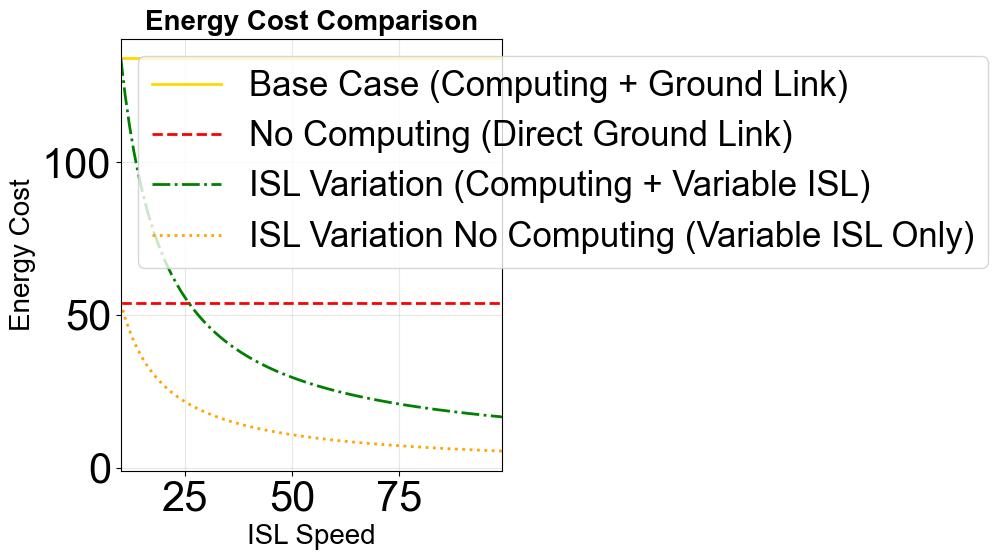

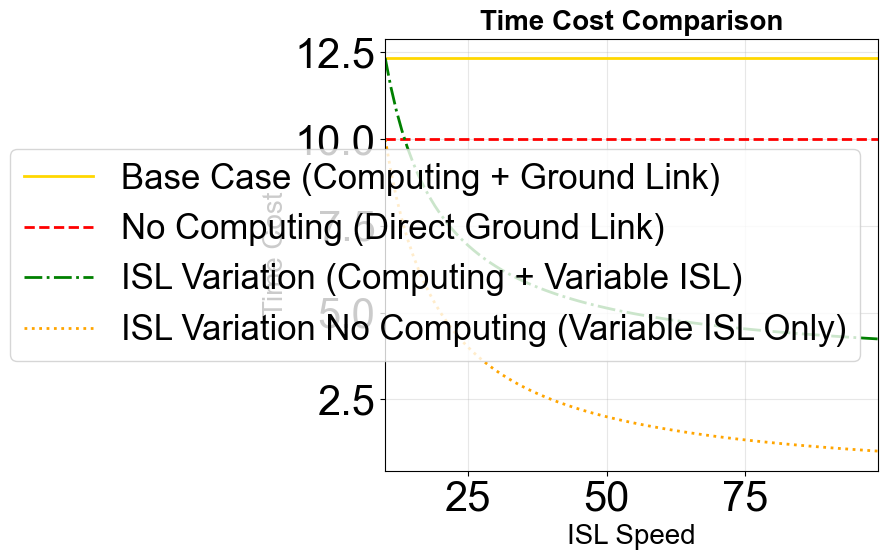

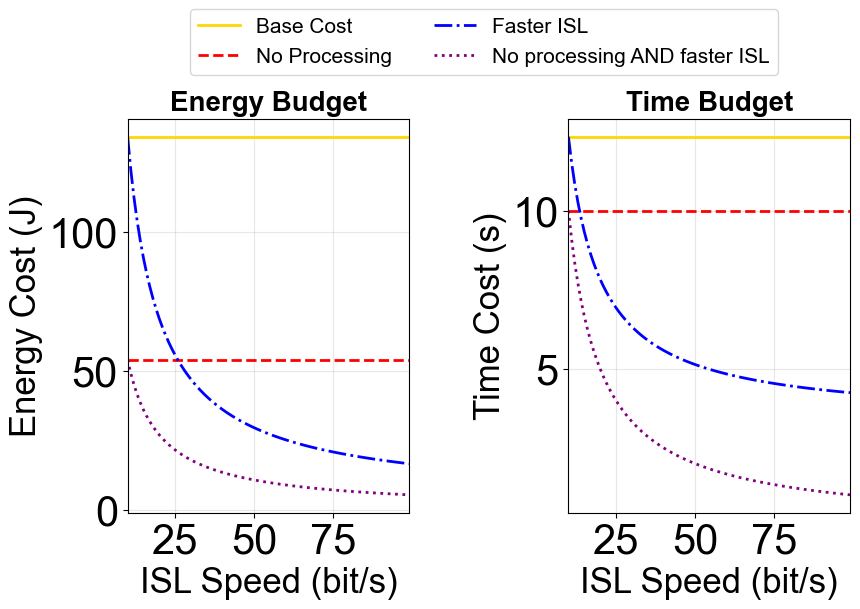

Plots saved:
- energy_cost_comparison.png (individual)
- time_cost_comparison.png (individual)
- energy_time_comparison.png (combined)


In [49]:
isl_speed_array = np.array(list(isl_speed))

def create_energy_plot():
    """Create and return energy cost plot"""
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))

    ax.plot(isl_speed_array, base_energy_cost,
             label='Base Case (Computing + Ground Link)',
             linewidth=2, color='gold', linestyle='-')

    ax.plot(isl_speed_array, no_computing_energy_cost,
             label='No Computing (Direct Ground Link)',
             linewidth=2, color='red', linestyle='--')

    ax.plot(isl_speed_array, isl_variation_energy_cost,
             label='ISL Variation (Computing + Variable ISL)',
             linewidth=2, color='green', linestyle='-.')

    ax.plot(isl_speed_array, isl_variation_no_computing_energy_cost,
             label='ISL Variation No Computing (Variable ISL Only)',
             linewidth=2, color='orange', linestyle=':')

    ax.set_xlabel('ISL Speed', fontsize=20)
    ax.set_ylabel('Energy Cost', fontsize=20)
    ax.set_title('Energy Cost Comparison', fontsize=20, fontweight='bold')
    ax.legend()
    ax.grid(True, alpha=0.3)
    ax.set_xlim(min(isl_speed), max(isl_speed))

    plt.tight_layout()
    return fig, ax

def create_time_plot():
    """Create and return time cost plot"""
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))

    ax.plot(isl_speed_array, base_time_cost,
             label='Base Case (Computing + Ground Link)',
             linewidth=2, color='gold', linestyle='-')

    ax.plot(isl_speed_array, no_computing_time_cost,
             label='No Computing (Direct Ground Link)',
             linewidth=2, color='red', linestyle='--')

    ax.plot(isl_speed_array, isl_variation_time_cost,
             label='ISL Variation (Computing + Variable ISL)',
             linewidth=2, color='green', linestyle='-.')

    ax.plot(isl_speed_array, isl_variation_no_computing_time_cost,
             label='ISL Variation No Computing (Variable ISL Only)',
             linewidth=2, color='orange', linestyle=':')

    ax.set_xlabel('ISL Speed', fontsize=20)
    ax.set_ylabel('Time Cost', fontsize=20)
    ax.set_title('Time Cost Comparison', fontsize=20, fontweight='bold')
    ax.legend()
    ax.grid(True, alpha=0.3)
    ax.set_xlim(min(isl_speed), max(isl_speed))

    plt.tight_layout()
    return fig, ax

# Create individual plots
fig_energy, ax_energy = create_energy_plot()
fig_energy.savefig('energy_cost_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

fig_time, ax_time = create_time_plot()
fig_time.savefig('time_cost_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# Create combined plot with reduced width (40% reduction from 15 to 9)
fig_combined, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 6))

# Energy Cost Plot (left subplot)
ax1.plot(isl_speed_array, base_energy_cost,
         label='Base Cost',
         linewidth=2, color='gold', linestyle='-')

ax1.plot(isl_speed_array, no_computing_energy_cost,
         label='No Processing',
         linewidth=2, color='red', linestyle='--')

ax1.plot(isl_speed_array, isl_variation_energy_cost,
         label='Faster ISL',
         linewidth=2, color='blue', linestyle='-.')

ax1.plot(isl_speed_array, isl_variation_no_computing_energy_cost,
         label='No processing AND faster ISL',
         linewidth=2, color='purple', linestyle=':')

ax1.set_xlabel('ISL Speed (bit/s)', fontsize=25)
ax1.set_ylabel('Energy Cost (J)', fontsize=25)
ax1.set_title('Energy Budget', fontsize=20, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.set_xlim(min(isl_speed), max(isl_speed))

# Time Cost Plot (right subplot)
ax2.plot(isl_speed_array, base_time_cost,
         label='Base Cost',
         linewidth=2, color='gold', linestyle='-')

ax2.plot(isl_speed_array, no_computing_time_cost,
         label='No Processing',
         linewidth=2, color='red', linestyle='--')

ax2.plot(isl_speed_array, isl_variation_time_cost,
         label='Faster ISL',
         linewidth=2, color='blue', linestyle='-.')

ax2.plot(isl_speed_array, isl_variation_no_computing_time_cost,
         label='No processing AND faster ISL',
         linewidth=2, color='purple', linestyle=':')

ax2.set_xlabel('ISL Speed (bit/s)', fontsize=25)
ax2.set_ylabel('Time Cost (s)', fontsize=25)
ax2.set_title('Time Budget', fontsize=20, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.set_xlim(min(isl_speed), max(isl_speed))

# Create a single legend at the top of the figure
handles, labels = ax1.get_legend_handles_labels()
fig_combined.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.56, 1.05), ncol=2, fontsize=15)

# Adjust layout and save combined plot
plt.tight_layout()
plt.subplots_adjust(top=0.85)  # Make room for the top legend
fig_combined.savefig('energy_time_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("Plots saved:")
print("- energy_cost_comparison.png (individual)")
print("- time_cost_comparison.png (individual)")
print("- energy_time_comparison.png (combined)")